In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
%matplotlib inline
import statistics
import ssl
from scipy.stats import pearsonr

#### 1.Загрузить файл hr.csv.

In [2]:
df=pd.read_csv('HR.csv')
df.head()
# https://prnt.sc/r3kbb9 - расшифровка измерений

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#### 2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [4]:
df.info()
# ура, все колонки заполнены и в каждой колнке данные одного типа

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [3]:
df.select_dtypes(include='object').mode()

,sales,salary
0,sales,low


#### 3.Рассчитать и визуализировать корреляционную матрицу для переменных

In [7]:
corr_matrix = df.corr()
corr_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


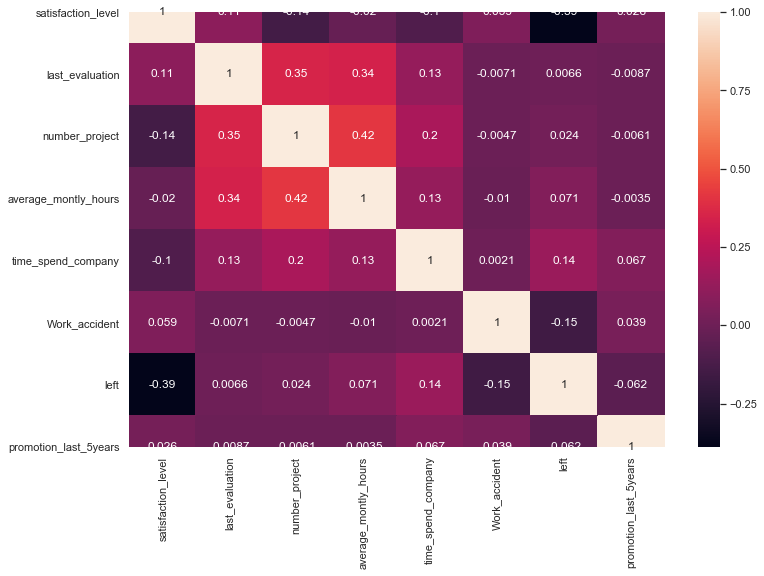

In [9]:
sns.set(rc=({'figure.figsize':(12, 8)}))
sns.heatmap(corr_matrix, annot=True, xticklabels=corr_matrix.columns.values, yticklabels=corr_matrix.columns.values)

# по рассчитанным коэф корреляции, самый высокий у number_project и average_montly_hours = 0.42

#### 4.Визуализировать несколько взаимосвязей между переменными.

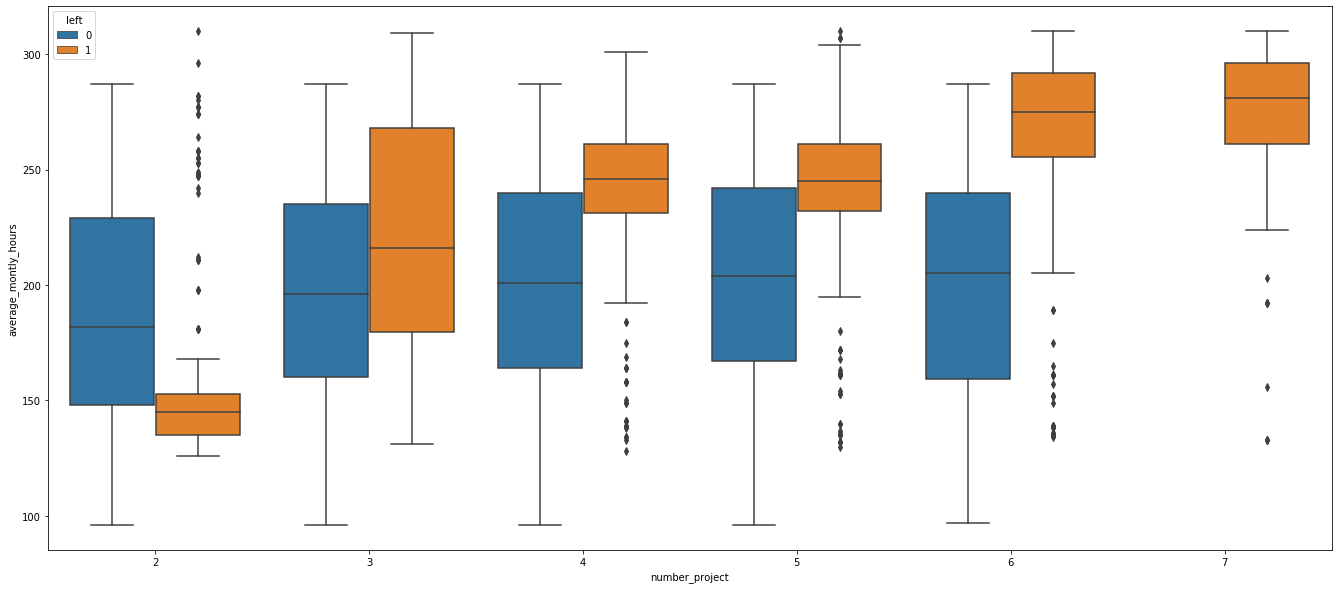

In [9]:
"""
Визуализируем number_project и average_montly_hours = 0.42 с помощью boxplot и с разбивкой на уволившихся и оставшихся 
(параметр hue = 'left').

На графике видим 

1. для сотрудников с number_project > 2 распределение average_montly_hours смещено выше у уволившихся 
=> гипотеза 1: в группе уволившихся с 3 и более проектами нагрузка по часам выше. 
=> гипотеза 2: в группе уволившихся с 2 проектами сотрудники сотрудники увольнялись либо потому что были недозагружены,
либо потому что плохо справлялись (посмотреть оценку их работы). 
2. в группе оставшихся (синие) распредление average_montly_hours меняется не так драматически с ростом числа проектов.
Возможно, такие сотрудники умеют лучше планировать свое время и не перегорают.

"""

plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="number_project", y="average_montly_hours", hue = 'left', data=df)

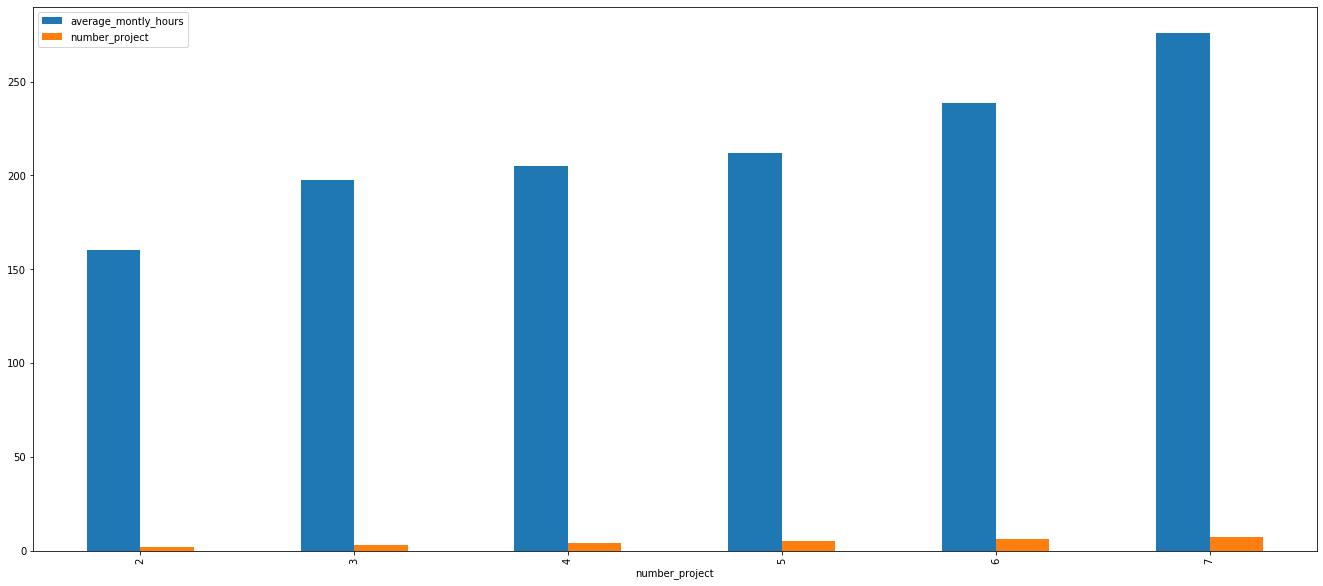

In [11]:
"""
1. С возрастанием числа проектов растет среднее число рабочих часов в месяц, что логично
2. "Потолок" числа проектов равен 7. Можно увидеть, что все сотрудники с максимальным числом проектов = 7, уволились
df[(df.number_project == 7) & (df.left == 0)] - пустой результат


"""

df[['average_montly_hours', 'number_project']].groupby(df['number_project']).mean().plot(kind='bar')

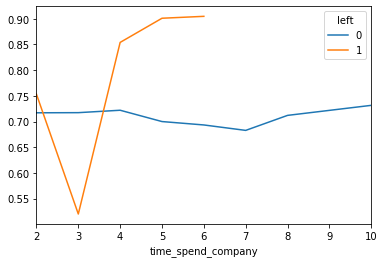

In [19]:
""" Визуализируем last evaluation, time_spend_company и left (1 - уволился, 0 - остался)

На графике ниже видно:

1. максимальное число лет работы в компании в группе уволившихся - 6 лет, в группе оставшихся - 10 лет

2. начиная с 3 года в группе уволившихся средняя оценка сотрудника сильно вырастает и выше, чем средняя оценка сотрудников
в группе не уволившихся. Т.е., компания оценивает работу сотрудника даже выше, чем тех, кто остается.
Вероятно, сотрудник увольняется сам (идет на повышение в другую компанию или просто устает, т.к. работает по часам больше).

Те, кто увольняется на 3 годе работы, имеют оценку сильно ниже, чем те, кто продолжили работать.
Тут, похоже, что их уволили из-за несоответсвия требованиям.

3. в группе неуволившихся оценка сотрудника имеет более менее ровные значения на 10 летнем горизонте

"""

left_stat = df.pivot_table(index='time_spend_company', 
                        columns='left', 
                        values='last_evaluation', 
                        aggfunc='mean')
left_stat.plot()




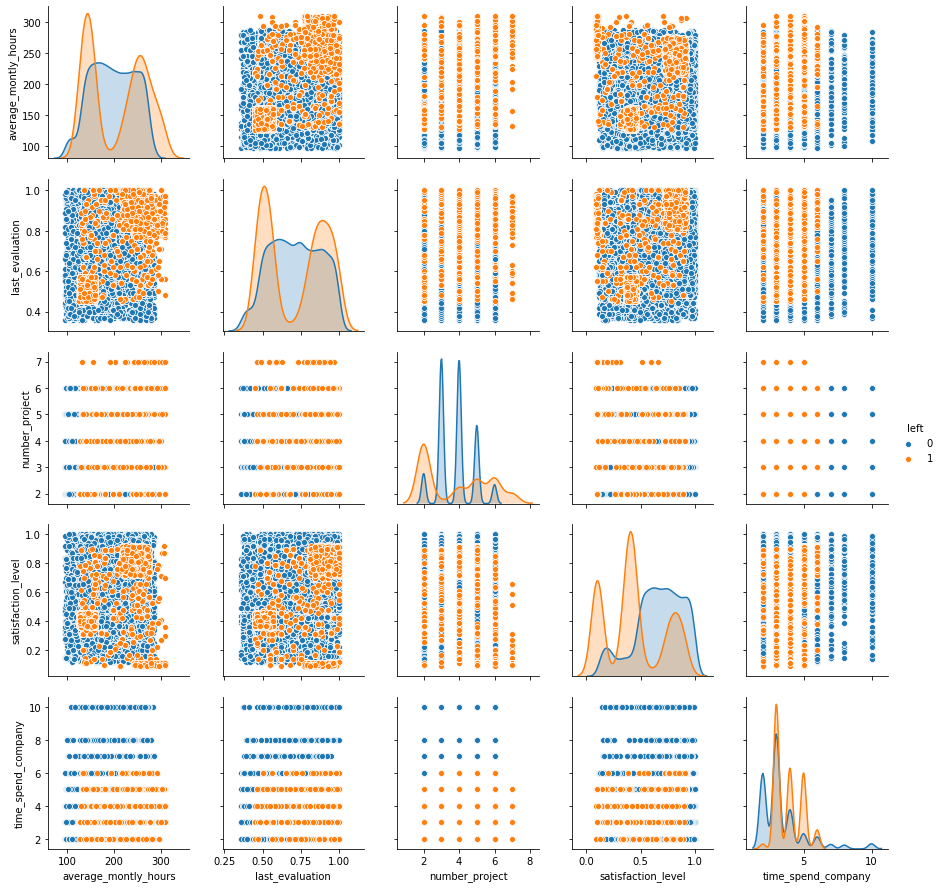

In [31]:
# df2 = df[['average_montly_hours','last_evaluation','number_project', 'satisfaction_level','left']]
# fig = sns.pairplot(data=df2, hue='left')
# plt.show()

sns.pairplot(df, vars=['average_montly_hours','last_evaluation','number_project', 'satisfaction_level', 'time_spend_company'], kind="scatter", hue='left')

In [75]:
"""
уровни удовлетворенности по департаментам не сильно различаются. Они различаются среди уволившихся и оставшихся

"""
df.pivot_table(         index='sales', 
                        columns='left', 
                        values='satisfaction_level', 
                        aggfunc='mean', margins = True)

left,0,1,All
sales,,,
IT,0.677170,0.411868,0.618142
RandD,0.653799,0.432810,0.619822
accounting,0.647211,0.402598,0.582151
hr,0.666679,0.433395,0.598809
management,0.654861,0.422857,0.621349
marketing,0.669878,0.453153,0.618601
product_mng,0.658466,0.481566,0.619634
sales,0.668548,0.447663,0.614447
support,0.673799,0.450901,0.618300


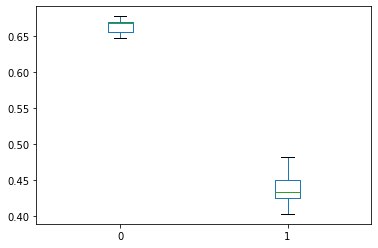

In [76]:
"""
Графике видны различия в уровне удовлетворенности работой среди уволившихся и оставшихся
При этом по департаментам уровни удовлетворенности не сильно различаются

"""

df6 = df.pivot_table(   index='sales', 
                        columns='left', 
                        values='satisfaction_level', 
                        aggfunc='mean').plot(kind='box')

In [37]:
# df.pivot_table(         index=['time_spend_company','promotion_last_5years'], 
#                         columns='left', 
#                         values='satisfaction_level', 
#                         aggfunc='count', fill_value = 0, margins = True).reset_index()

#### 5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

In [42]:
# satisfaction_level и number_project

print(statistics.variance(df.satisfaction_level), statistics.variance(df.number_project))

print(sts.ttest_ind(df.satisfaction_level, df.number_project, equal_var=False))

if pvalue > 0.05:
    print('принимаем Н0 => группы статистически не различаются')
else:
    print('отвергаем Н0 => группы статистически отличаются')

0.061817200647087636 1.5192839143892432
Ttest_indResult(statistic=-310.721972689063, pvalue=0.0)
отвергаем Н0 => группы статистически отличаются


In [40]:
# number_project и average_montly_hours

print(statistics.variance(df.number_project), statistics.variance(df.average_montly_hours))

print(sts.ttest_ind(df.number_project, df.average_montly_hours, equal_var=False))

if pvalue > 0.05:
    print('принимаем Н0 => группы статистически не различаются')
else:
    print('отвергаем Н0 => группы статистически отличаются')

1.5192839143892432 2494.313174809956
Ttest_indResult(statistic=-483.5422960342509, pvalue=0.0)
отвергаем Н0 => группы статистически отличаются


In [45]:
# Work_accident и left

print(statistics.variance(df.Work_accident), statistics.variance(df.left))

print(sts.ttest_ind(df.Work_accident, df.left, equal_var=False))

if pvalue > 0.05:
    print('принимаем Н0 => группы статистически не различаются')
else:
    print('отвергаем Н0 => группы статистически отличаются')

0.12370594008840932 0.18141133843291912
Ttest_indResult(statistic=-20.724471296371643, pvalue=1.0161077566042209e-94)
отвергаем Н0 => группы статистически отличаются


#### 6.Рассчитать сколько работников работает в каждом департаменте

In [106]:
df.pivot_table(         index='sales', 
                        columns='left', 
                        values='time_spend_company', 
                        aggfunc='count', margins = True)

left,0,1,All
sales,,,
IT,954,273,1227
RandD,666,121,787
accounting,563,204,767
hr,524,215,739
management,539,91,630
marketing,655,203,858
product_mng,704,198,902
sales,3126,1014,4140
support,1674,555,2229


#### 7.Показать распределение сотрудников по зарплатам.

In [56]:
salary = df.salary.value_counts(normalize=True)*100
salary

low       48.776585
medium    42.976198
high       8.247216
Name: salary, dtype: float64

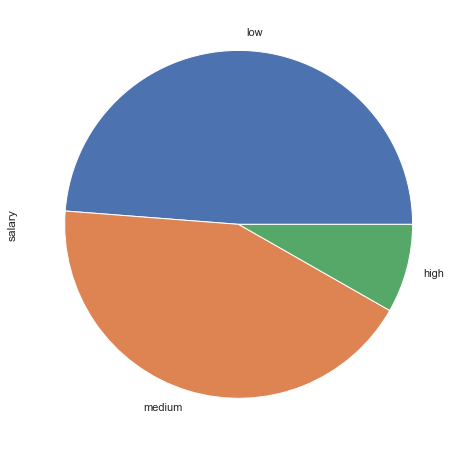

In [53]:
salary.plot(kind='pie', y='sales')

#### 8.Показать распределение сотрудников по зарплатам совместно с департаментами.

In [33]:
df1 = df.pivot_table(         index='sales', 
                        columns='salary', 
                        values='time_spend_company', 
                        aggfunc='count')
df1

salary,high,low,medium
sales,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


In [38]:
df1.reindex(['low','medium', 'high'], axis=1)
# df1 = df1[['low','medium', 'high']]
# df1

salary,low,medium,high
sales,,,
IT,609,535,83
RandD,364,372,51
accounting,358,335,74
hr,335,359,45
management,180,225,225
marketing,402,376,80
product_mng,451,383,68
sales,2099,1772,269
support,1146,942,141


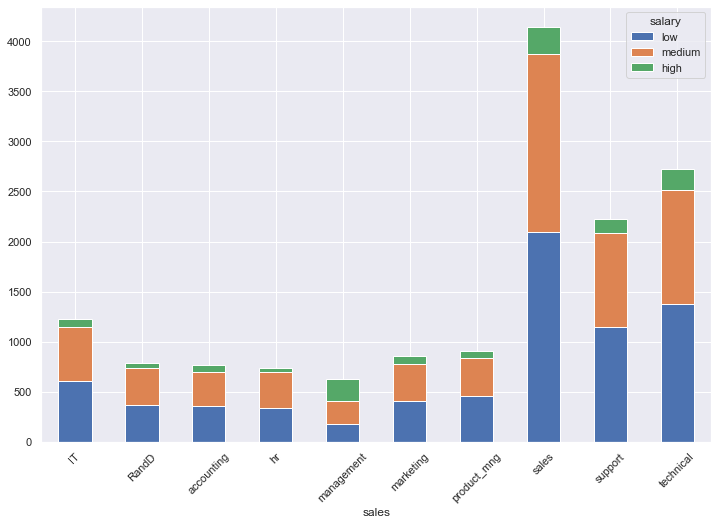

In [39]:
df1.plot(kind='bar', rot=45, stacked=True)

#### 9.Сколько сотрудников покинули компанию.

In [23]:
df[df.left == 1].left.count()

3571

left,0,1,percent_left
salary,,,
high,1155,82,0.066289
low,5144,2172,0.296884
medium,5129,1317,0.204313


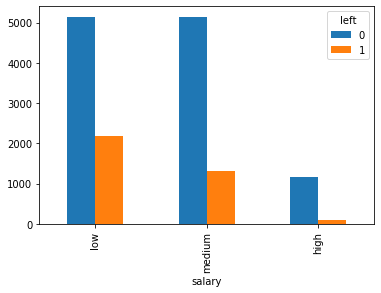

In [38]:
#в группе низких зарплат доля уволившихся выше

df5 = df.pivot_table(         index='salary', 
                        columns='left', 
                        values='time_spend_company', 
                        aggfunc='count')
df5.reindex(['low','medium', 'high'], axis=0).plot(kind = 'bar')

df5.reset_index()
df5['percent_left'] = df5[1]/(df5[0] + df5[1])
df5

In [24]:
#наибольшая доля увольнений в hr и accounting - они явно что-то знают))
# но в абсолюте больше всего увольнялись в отделах sales, support, technical
#наименьшая доля увольнений в management и RandD

df5 = df.pivot_table(         index='sales', 
                        columns='left', 
                        values='time_spend_company', 
                        aggfunc='count', margins = True)

df5.reset_index()
df5['percent_left'] = df5[1]/(df5[0] + df5[1])
df5

left,0,1,All,percent_left
sales,,,,
IT,954,273,1227,0.222494
RandD,666,121,787,0.153748
accounting,563,204,767,0.265971
hr,524,215,739,0.290934
management,539,91,630,0.144444
marketing,655,203,858,0.236597
product_mng,704,198,902,0.219512
sales,3126,1014,4140,0.244928
support,1674,555,2229,0.248991


#### 10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

#### Гипотеза: уровень удовлетворенности работой у уволившихся и не уволившихся не различается

In [72]:
"""
Сравним уровень удовлетворенности у уволившихся и не уволившихся
H0 - нет статистических различий по удовлетворенности работой
H1 - есть различия

"""
sts.normaltest(df.satisfaction_level)

NormaltestResult(statistic=1200.9584504966565, pvalue=1.6412924703269606e-261)

In [48]:
satisfaction_left_1 = df[df['left'] == 1]['satisfaction_level']
satisfaction_left_0 = df[df['left'] == 0]['satisfaction_level']

sat_left_1 = satisfaction_left_1.sample(3571)
sat_left_0 = satisfaction_left_0.sample(3571)


statistics.variance(sat_left_1), statistics.variance(sat_left_0)

(0.06966085873834273, 0.04527938262395409)

In [49]:
statistic, pvalue = sts.ttest_ind(sat_left_1, sat_left_0, equal_var=False)

print(statistic, pvalue)

if pvalue > 0.05:
    print('принимаем Н0 => группы статистически не различаются')
else:
    print('отвергаем Н0 => группы статистически отличаются')

-40.5289240757433 0.0
отвергаем Н0 => группы статистически отличаются


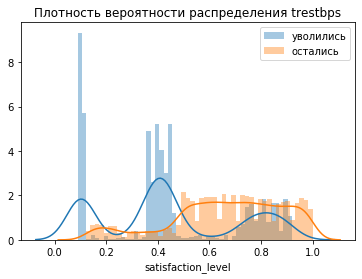

In [66]:
"""
На графике видим, что у тех, кто уволился, уровень удовлетворенности смещен в меньшую сторону.
Соответсвует логике, что менее довольные сотрудники вероятнее уволятся.

"""

sns.distplot(satisfaction_left_1, 50)
sns.distplot(satisfaction_left_0, 50)
plt.title('Плотность вероятности распределения satisfaction_level')
plt.legend(['уволились', 'остались'])
plt.show()

#### Гипотеза: в группах по зп = low и medium нет статистических различий по увольнениям

In [52]:
"""
Сравним теперь только выборки по зп = low и medium на наличие уволившихся.
Эти группы сопоставимы численности, интересно посмотреть на их связь.
H0 - нет статистических различий по увольнениям
H1 - есть различия

"""

low_salary = df[df['salary'] == 'low']['left']
medium_salary = df[df['salary'] == 'medium']['left']
print(len(low_salary), len(medium_salary))


low_salary = low_salary.sample(6446)
medium_salary = medium_salary.sample(6446)

statistics.variance(low_salary), statistics.variance(medium_salary)

7316 6446


(0.20866815727821297, 0.16259427548359623)

In [53]:
statistic, pvalue = sts.ttest_ind(low_salary, medium_salary, equal_var=False)

print(statistic, pvalue)

if pvalue > 0.05:
    print('принимаем Н0 => группы статистически не различаются')
else:
    print('отвергаем Н0 => группы статистически отличаются')

Ttest_indResult(statistic=12.162736892516882, pvalue=7.522472761527532e-34)
отвергаем Н0 => группы статистически отличаются


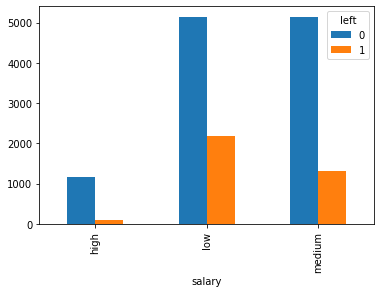

In [75]:
df.pivot_table(         index='salary', 
                        columns='left', 
                        values='time_spend_company', 
                        aggfunc='count').plot(kind = 'bar')

#### Гипотеза: группы с разным уровнем зп статистически не различаются по увольняющимся
Множественный тест (ANOVA)
Распределим выборку на 3 группы по уровню зп. Сравним их на наличие уволившихся
H0 - нет стат различий по увольнениям у групп с разным уровнем зп
H1 - есть различия

In [57]:
low_salary = df[df['salary'] == 'low']['left']
medium_salary = df[df['salary'] == 'medium']['left']
high_salary = df[df['salary'] == 'high']['left']

statistic, pvalue = sts.f_oneway(low_salary, medium_salary, high_salary)

print(sts.f_oneway(low_salary, medium_salary, high_salary))
if pvalue > 0.05:
    print('принимаем Н0 => группы статистически не различаются')
else:
    print('отвергаем Н0 => группы статистически отличаются')

F_onewayResult(statistic=195.54449374860312, pvalue=1.4608629258860592e-84)
отвергаем Н0 => группы статистически отличаются


#### Гипотеза: среднее кол-во рабочих часов у волившихся и оставшихся не различается

In [67]:
hours_left_1 = df[df['left'] == 1]['average_montly_hours']
hours_left_0 = df[df['left'] == 0]['average_montly_hours']

print(len(hours_left_1), len(hours_left_0))


hours_left_1 = hours_left_1.sample(3571)
hours_left_0 = hours_left_0.sample(3571)

statistics.variance(hours_left_1), statistics.variance(hours_left_0)

3571 11428


(3745.7858381437145, 2057.4473485837907)

In [68]:
statistic, pvalue = sts.ttest_ind(hours_left_1, hours_left_0, equal_var=False)

print(statistic, pvalue)

if pvalue > 0.05:
    print('принимаем Н0 => группы статистически не различаются')
else:
    print('отвергаем Н0 => группы статистически отличаются')

6.630508806026254 3.6108225385508974e-11
отвергаем Н0 => группы статистически отличаются


#### Гипотеза: уволившихся и оставшихся оценивали одинаково

In [90]:
evaluation_left_1 = df[df['left'] == 1]['last_evaluation']
evaluation_left_0 = df[df['left'] == 0]['last_evaluation']
print(len(evaluation_left_1), len(evaluation_left_0))


evaluation_left_1 = evaluation_left_1.sample(3571)
evaluation_left_0 = evaluation_left_0.sample(3571)

statistics.variance(evaluation_left_1), statistics.variance(evaluation_left_0)

3571 11428


(0.03907475595110629, 0.026137239700136563)

In [91]:
statistic, pvalue = sts.ttest_ind(evaluation_left_1, evaluation_left_0,equal_var=False)

print(statistic, pvalue)

if pvalue > 0.05:
    print('принимаем Н0 => группы статистически не различаются')
else:
    print('отвергаем Н0 => группы статистически отличаются')

0.8912103834758235 0.3728475273476928
принимаем Н0 => группы статистически не различаются


#### Ниже вспомогательные таблицы (не для проверки)

In [78]:
df.pivot_table(         index='sales', 
#                         columns='left', 
                        values=['average_montly_hours', 'last_evaluation', 'number_project'], 
                        aggfunc='mean', margins = True)

,average_montly_hours,last_evaluation,number_project
sales,,,
IT,202.215974,0.716830,3.816626
RandD,200.800508,0.712122,3.853875
accounting,201.162973,0.717718,3.825293
hr,198.684709,0.708850,3.654939
management,201.249206,0.724000,3.860317
marketing,199.385781,0.715886,3.687646
product_mng,199.965632,0.714756,3.807095
sales,200.911353,0.709717,3.776329
support,200.758188,0.723109,3.803948


In [99]:
df[df.left == 1].groupby('time_spend_company').agg(['mean', 'sum'])


satisfaction_level         last_evaluation          \
                                 mean     sum            mean     sum   
time_spend_company                                                      
2                            0.521698   27.65        0.753208   39.92   
3                            0.411740  653.02        0.520019  824.75   
4                            0.146933  130.77        0.854000  760.06   
5                            0.714034  594.79        0.901032  750.56   
6                            0.791196  165.36        0.904737  189.09   

                   number_project       average_montly_hours          \
                             mean   sum                 mean     sum   
time_spend_company                                                     
2                        4.056604   215           210.773585   11171   
3                        2.097730  3327           147.377049  233740   
4                        5.960674  5305           269.612360  239955   
5                        4.759904  3965           246.337335  205199   
6                        4.574163   956           242.244019   50629   

                   Work_accident     left       promotion_last_5years      
                            mean sum mean   sum                  mean sum  
time_spend_company                                                         
2                       0.018868   1    1    53              0.000000   0  
3                       0.046658  74    1  1586              0.009458  15  
4                       0.050562  45    1   890              0.003371   3  
5                       0.046819  39    1   833              0.001200   1  
6                       0.047847  10    1   209              0.000000   0

In [100]:
df[df.left == 0].groupby('time_spend_company').agg(['mean', 'sum'])


satisfaction_level          last_evaluation           \
                                 mean      sum            mean      sum   
time_spend_company                                                        
2                            0.699991  2233.67        0.717004  2287.96   
3                            0.696380  3382.32        0.717278  3483.82   
4                            0.638674  1064.67        0.721974  1203.53   
5                            0.475297   304.19        0.699953   447.97   
6                            0.526346   267.91        0.693340   352.91   
7                            0.635957   119.56        0.682766   128.36   
8                            0.665062   107.74        0.711975   115.34   
10                           0.655327   140.24        0.731495   156.54   

                   number_project        average_montly_hours          \
                             mean    sum                 mean     sum   
time_spend_company                                                      
2                        3.681291  11747           199.956440  638061   
3                        3.729463  18114           199.451513  968736   
4                        3.916017   6528           198.812238  331420   
5                        4.206250   2692           192.576562  123249   
6                        4.064833   2069           199.654224  101624   
7                        3.851064    724           200.744681   37740   
8                        3.777778    612           193.802469   31396   
10                       3.682243    788           199.224299   42634   

                   Work_accident      left     promotion_last_5years       
                            mean  sum mean sum                  mean  sum  
time_spend_company                                                         
2                       0.174553  557    0   0              0.016923   54  
3                       0.169034  821    0   0              0.024501  119  
4                       0.163767  273    0   0              0.019196   32  
5                       0.206250  132    0   0              0.025000   16  
6                       0.190570   97    0   0              0.033399   17  
7                       0.138298   26    0   0              0.191489   36  
8                       0.271605   44    0   0              0.061728   10  
10                      0.233645   50    0   0              0.074766   16

In [101]:
df[df.left == 1].groupby('number_project').agg(['mean', 'sum'])

satisfaction_level         last_evaluation          \
                             mean     sum            mean     sum   
number_project                                                      
2                        0.412948  647.09        0.518571  812.60   
3                        0.579861   41.75        0.753194   54.23   
4                        0.752689  307.85        0.883154  361.21   
5                        0.752337  460.43        0.902075  552.07   
6                        0.128366   84.08        0.861389  564.21   
7                        0.118711   30.39        0.859609  220.06   

               average_montly_hours         time_spend_company        \
                               mean     sum               mean   sum   
number_project                                                         
2                        146.310147  229268           3.027441  4744   
3                        218.986111   15767           3.958333   285   
4                        242.041565   98995           4.899756  2004   
5                        243.547386  149051           5.032680  3080   
6                        270.132824  176937           4.087023  2677   
7                        276.078125   70676           4.113281  1053   

               Work_accident     left       promotion_last_5years      
                        mean sum mean   sum                  mean sum  
number_project                                                         
2                   0.046586  73    1  1567              0.007658  12  
3                   0.013889   1    1    72              0.000000   0  
4                   0.066015  27    1   409              0.009780   4  
5                   0.047386  29    1   612              0.000000   0  
6                   0.053435  35    1   655              0.004580   3  
7                   0.015625   4    1   256              0.000000   0

In [102]:
df[df.left == 0].groupby('number_project').agg(['mean', 'sum'])

satisfaction_level          last_evaluation           \
                             mean      sum            mean      sum   
number_project                                                        
2                        0.604397   496.21        0.663812   544.99   
3                        0.689618  2746.75        0.715910  2851.47   
4                        0.689181  2726.40        0.725210  2868.93   
5                        0.657971  1413.98        0.722122  1551.84   
6                        0.456570   236.96        0.692100   359.20   

               average_montly_hours         time_spend_company         \
                               mean     sum               mean    sum   
number_project                                                          
2                        187.125457  153630           3.472594   2851   
3                        197.119257  785126           3.274416  13042   
4                        201.305106  796363           3.305612  13077   
5                        203.094928  436451           3.449046   7412   
6                        199.017341  103290           4.325626   2245   

               Work_accident      left     promotion_last_5years       
                        mean  sum mean sum                  mean  sum  
number_project                                                         
2                   0.181486  149    0   0              0.030451   25  
3                   0.178007  709    0   0              0.023851   95  
4                   0.165824  656    0   0              0.028564  113  
5                   0.180084  387    0   0              0.023267   50  
6                   0.190751   99    0   0              0.032755   17